## As CO2 emissions for a country rise, what affect does it has on the crude Death rate?

## Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,7)

## Import the World Indicator dataset

In [2]:
ind = pd.read_csv('world-development-indicators/Indicators.csv')

## Convert Year from an int to a Category

In [3]:
#ind.Year = ind.Year.astype('category')

---------

In [4]:
#pd.options.display.max_rows = 10000
#pd.options.display.max_columns = 100
#pd.options.display.max_colwidth = 100
#ind_name = pd.Series((ind['IndicatorName'].unique()))x
#ind_name.sort_values()
#pd.reset_option('all')
#countries = data['CountryName'].unique().tolist()
#indicators = data['IndicatorName'].unique().tolist()

----

## co2 = CO2 emissions (metric tons per capita)
## death = Death rate, crude (per 1,000 people)

In [5]:
co2 = ind[ind.IndicatorName == 'CO2 emissions (metric tons per capita)']
crude = ind[ind.IndicatorName == 'Death rate, crude (per 1,000 people)']

## Rename the columns, and remove uneeded columns, and merge the two data frames

In [6]:
co2 = co2.drop(['IndicatorName', 'IndicatorCode'], axis=1)

In [7]:
co2.columns = ['CountryName', 'CountryCode', 'Year', 'CO2']

In [8]:
crude = crude.drop(['IndicatorName', 'IndicatorCode'], axis=1)

In [9]:
crude.columns = ['CountryName', 'CountryCode', 'Year', 'death_rate']

In [10]:
co2_crude = pd.merge(co2, crude, how='inner', on=['CountryCode', 'Year'])

In [11]:
co2_crude = co2_crude.drop(['CountryName_y'], axis=1)

In [12]:
co2_crude.columns=['CountryName', 'CountryCode', 'Year', 'CO2', 'death_rate']

In [13]:
co2_crude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 0 to 10341
Data columns (total 5 columns):
CountryName    10342 non-null object
CountryCode    10342 non-null object
Year           10342 non-null int64
CO2            10342 non-null float64
death_rate     10342 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 484.8+ KB


## Let's look at the overall dataset

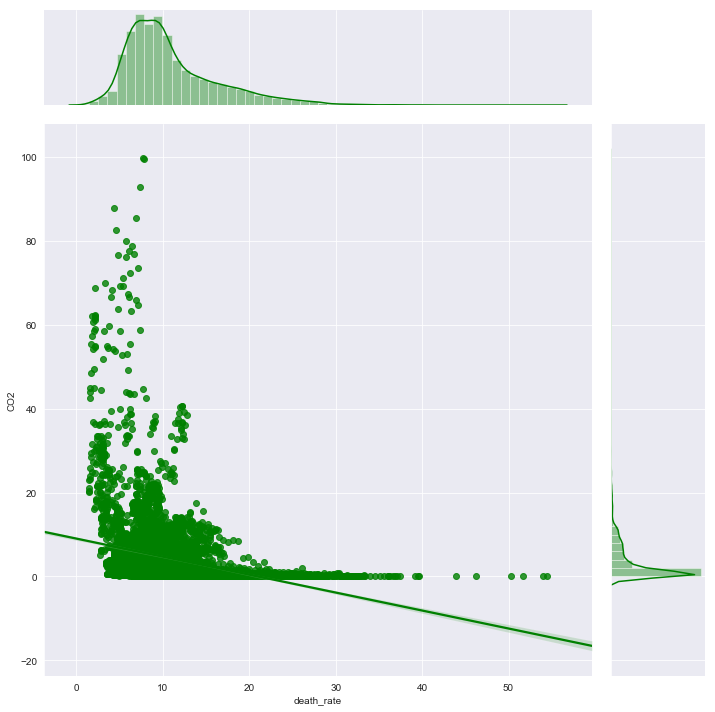

In [14]:
plt.rcParams["figure.figsize"] = (16,8)
view = sns.jointplot(data=co2_crude, x='death_rate', y='CO2', \
                  color='Green', kind='reg',height=10  )

## Filter to one year per decade

In [15]:
data = [1960, 1970, 1980, 1990, 2000, 2010]
data = co2_crude[co2_crude.Year.isin(data)]
data.Year.unique()

array([1960, 1970, 1980, 1990, 2000, 2010], dtype=int64)

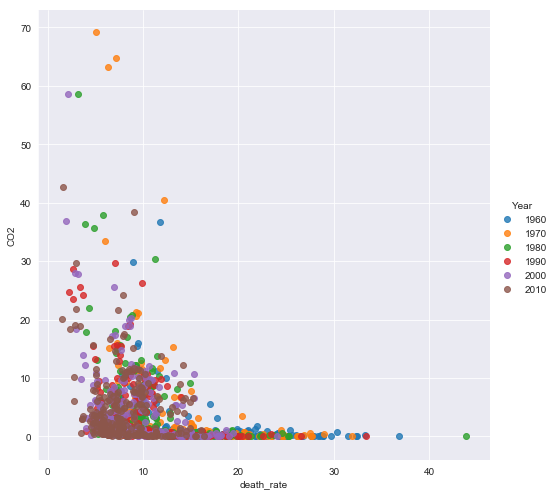

In [16]:
plt.rcParams["figure.figsize"] = (16,8)
view = sns.lmplot(data=data, x='death_rate', y='CO2', hue='Year', fit_reg=False, \
                 size = 7, aspect=1)

## Convert Year to a category

In [17]:
data.Year = data.Year.astype('category')

In [18]:
print(data.Year.cat.categories)

Int64Index([1960, 1970, 1980, 1990, 2000, 2010], dtype='int64')


## Dashboard showing CO2 vs Death_rate treands

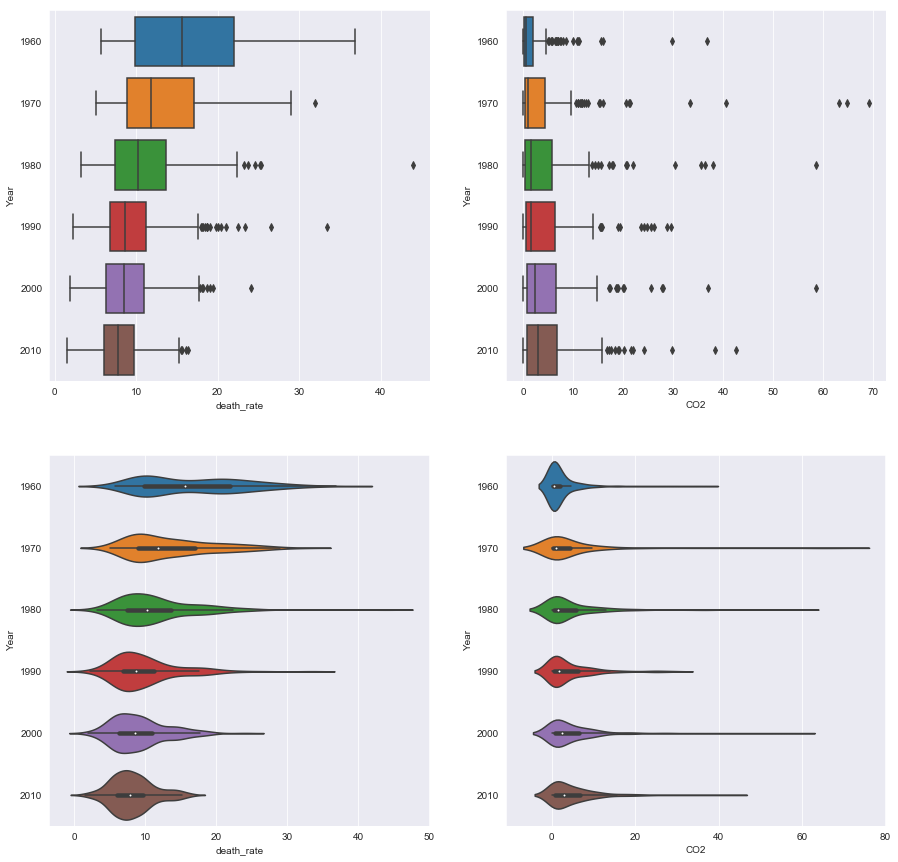

In [19]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15, 15))

v1 = sns.boxplot(data.death_rate, data.Year, ax=axes[0,0])
v2 = sns.boxplot(data.CO2, data.Year, ax=axes[0,1])
v3 = sns.violinplot(data.death_rate, data.Year, ax=axes[1,0])
v4 = sns.violinplot(data.CO2, data.Year, ax=axes[1,1])

plt.show()

## From this dashboard it is clear that as CO2 levels per person have risen the death rate has also fallen, however it overtime it seems to have leveled out.  Now let's just focus on a few regions 

In [20]:
data = [1960, 1970, 1980, 1990, 2000, 2010]
data = co2_crude[co2_crude.Year.isin(data)]
data.Year.unique()

array([1960, 1970, 1980, 1990, 2000, 2010], dtype=int64)

In [21]:
reg = ['United States', 'Spain', 'France', 'China', 'Mexico', 'Brazil', 'Finland','India', \
       'Germany','United Kingdom', 'Korea, Rep.', 'Ukraine','New Zealand', 'Canada', \
       'Chile', 'China','Colombia', 'Comoros', 'Congo', 'Dem. Rep.', 'Congo, Rep.','Costa Rica',\
       "Cote d'Ivoire", 'Cuba', 'Cyprus', 'Denmark','Zambia', 'Zimbabwe', 'Other small states', 'Bangladesh','Botswana']
reg = data[data.CountryName.isin(reg)]
print(reg.CountryName.unique())


['Brazil' 'Canada' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Cuba' 'Cyprus' 'Denmark' 'Finland' 'France'
 'India' 'Korea, Rep.' 'Mexico' 'New Zealand' 'Spain' 'United Kingdom'
 'United States' 'Zambia' 'Zimbabwe' 'Other small states' 'Bangladesh'
 'Botswana' 'Germany' 'Ukraine']


In [22]:
print(reg.Year.unique())

[1960 1970 1980 1990 2000 2010]


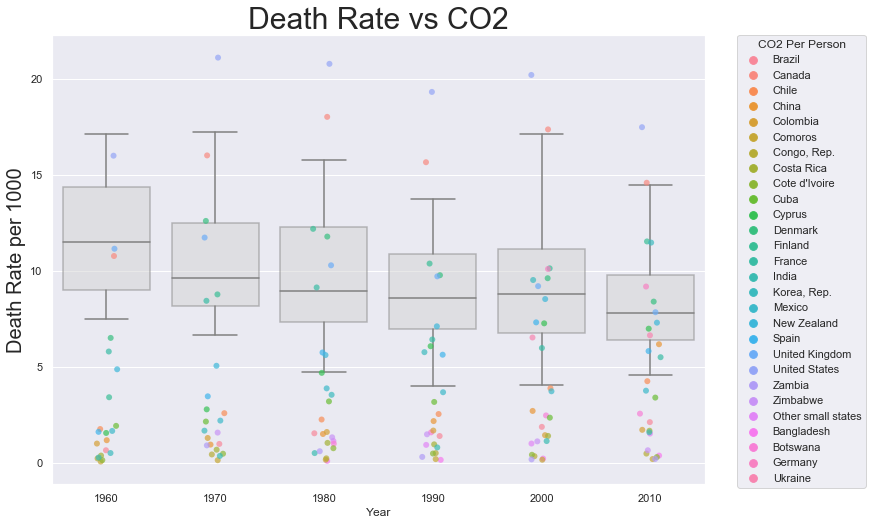

In [23]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

# Plot the boxsplots
ax = sns.boxplot(data=reg, x='Year', y='death_rate', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(x='Year', y='CO2', data=reg, jitter=True, size=6, linewidth=0, hue = 'CountryName', alpha=0.7)

ax.axes.set_title('Death Rate vs CO2',fontsize=30)
#ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Death Rate per 1000',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title='CO2 Per Person')

plt.show()

---

---

## Overall as the CO2 per person has risen the death rate worldwide has fallen.  This is true with most countries.  Some Countries like the United States have had a high CO2 level per person from 1960 on.  It seems like the trend is that as a country adapts technology, its death rate will fall, but the CO2 level will rise to a point and then level out, and start to fall per person.  The death rate has a similar leveling out affect as well.  